## Import the libraries

In [1]:
# See the value of multiple statements at once
#output for all commands in python jupyter notebook

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

# Importing the packages

import requests
import bs4
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


In [2]:
data = requests.get("https://www.hubertiming.com/results/2019MLK10K")

In [3]:
data_bs = BeautifulSoup(data.text)
data_bs

<!DOCTYPE html>
<html>
<head>
<meta content="Race results for the 2019 MLK Dream Run!" property="og:title"/>
<meta content="Results of the 2019 MLK Dream Run at Soul District in Portland, OR." property="og:description"/>
<meta content="https://www.hubertiming.com/results/2019MLKDreamRun.jpg" property="og:image"/>
<meta content="https://www.hubertiming.com/results/2019MLK10K" property="og:url"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>2019 MLK Dream Run 10K Race Results</title>
<link crossorigin="anonymous" href="https://stackpath.bootstrapcdn.com/bootstrap/4.1.1/css/bootstrap.min.css" integrity="sha384-WskhaSGFgHYWDcbwN70/dfYBj47jz9qbsMId/iRN3ewGhXQFZCSftd1LZCfmhktB" rel="stylesheet"/>
<link href="https://maxcdn.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css" rel="stylesheet"/>
<link href="//cdn.rawgit.com/noelboss/featherlight/1.7.11/release/featherlight.min.css" rel="stylesheet" type="text/css"/>
<link href="//cdn.r

In [4]:
td=data_bs.find_all("table")


In [5]:
Place = []
Bib = []
Name = []
Gender = []
Age =[]
City = []
State = []
Chip_Time = []
Chip_Pace = []
Gender_Place = []
Age_Group = []
Age_Group_Place = []
Time_to_start= []
Gun_Time = []    

In [6]:
for i in td[1].find_all('tr'):
    col=i.find_all('td')
    if len(col)==14:
        Place.append(col[0].find(text=True))
        Bib.append(col[1].find(text=True))
        Name.append(col[2].find(text=True))
        Gender.append(col[3].find(text=True))
        Age.append(col[4].find(text=True))
        City.append(col[5].find(text=True))
        State.append(col[6].find(text=True))
        Chip_Time.append(col[7].find(text=True))
        Chip_Pace.append(col[8].find(text=True))
        Gender_Place.append(col[9].find(text=True))
        Age_Group.append(col[10].find(text=True))
        Age_Group_Place.append(col[11].find(text=True))
        Time_to_start.append(col[12].find(text=True))
        Gun_Time.append(col[13].find(text=True))
        

In [7]:
df=pd.DataFrame({'Place':Place,'Bib':Bib,'Name':Name,'Gender':Gender,'Age':Age,'City':City,'State':State,'Chip_Time':Chip_Time,'Chip_Pace':Chip_Pace,'Gender_Place':Gender_Place,'Age_Group':Age_Group,'Age_Group_Place':Age_Group_Place,'Time_to_start':Time_to_start,'Gun_Time':Gun_Time})

# Count of the null values

In [8]:
df.isnull().sum()

Place               0
Bib                 0
Name                0
Gender              0
Age                 8
City               17
State              16
Chip_Time           0
Chip_Pace           0
Gender_Place        0
Age_Group           8
Age_Group_Place     0
Time_to_start       0
Gun_Time            0
dtype: int64

# Show the null values using heatmap

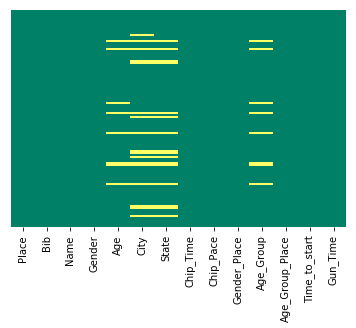

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer')

In [10]:
df2=df.dropna(how='any')

In [11]:
df2.isnull().sum()

Place              0
Bib                0
Name               0
Gender             0
Age                0
City               0
State              0
Chip_Time          0
Chip_Pace          0
Gender_Place       0
Age_Group          0
Age_Group_Place    0
Time_to_start      0
Gun_Time           0
dtype: int64

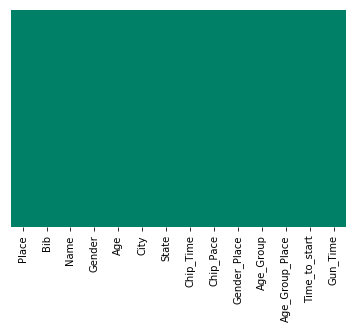

In [12]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='summer')

# Convert the column "Chip Time" into just minutes. One way to do this is to convert the column to a list first for manipulation.

In [13]:
new_chip = []
for i in df2['Chip_Time']:
    a = i.split(':')
    if len(a) == 2:
        new_chip.append('0:'+i)
    else:
        new_chip.append(i)
        
print(new_chip)

['0:35:55', '0:39:33', '0:39:43', '0:41:16', '0:41:16', '0:42:05', '0:43:59', '0:44:05', '0:44:25', '0:47:06', '0:48:32', '0:49:07', '0:49:24', '0:49:39', '0:50:09', '0:50:10', '0:51:18', '0:51:20', '0:51:54', '0:51:55', '0:52:05', '0:52:13', '0:52:53', '0:52:54', '0:53:15', '0:53:18', '0:53:41', '0:53:41', '0:53:47', '0:53:56', '0:54:33', '0:54:46', '0:55:51', '0:56:04', '0:56:06', '0:56:08', '0:56:09', '0:56:09', '0:56:11', '0:56:20', '0:56:53', '0:57:33', '0:57:39', '0:58:04', '0:58:21', '0:59:29', '1:00:24', '1:00:39', '1:00:48', '1:01:07', '1:01:40', '1:01:46', '1:01:46', '1:02:00', '1:02:00', '1:02:00', '1:02:06', '1:02:07', '1:02:25', '1:02:26', '1:02:40', '1:03:44', '1:03:53', '1:04:26', '1:06:10', '1:07:38', '1:07:39', '1:08:07', '1:08:09', '1:08:29', '1:08:49', '1:08:53', '1:09:28', '1:09:29', '1:10:13', '1:12:21', '1:12:21', '1:14:13', '1:14:15', '1:15:33', '1:15:59', '1:15:59', '1:17:48', '1:17:54', '1:19:26', '1:26:22', '1:27:11', '1:28:41', '1:45:38', '1:45:43']


In [14]:
new_chip[0]
import datetime
datetime.datetime.strptime(new_chip[0],'%H:%M:%S').second

'0:35:55'

55

In [15]:
from datetime import datetime
newchip = list(map(lambda i: datetime.strptime(i,'%H:%M:%S'),new_chip))

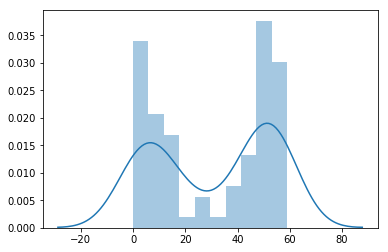

In [16]:
sns.distplot(list(map(lambda i: i.minute,newchip)),bins=10)

# Assign it with a new column as Runner_mins2

In [17]:
df2['Runner_mins'] = new_chip
df2

,Place,Bib,Name,Gender,Age,City,State,Chip_Time,Chip_Pace,Gender_Place,Age_Group,Age_Group_Place,Time_to_start,Gun_Time,Runner_mins
0,1,2086,CHRISTOPHER SHEAFFER,M,35,PORTLAND,OR,35:55,5:46,1 of 50,M 21-39,1 of 27,0:03,35:58,0:35:55
1,2,2036,DAVID MILLER,M,43,PORTLAND,OR,39:33,6:21,2 of 50,M 40-54,1 of 9,0:03,39:36,0:39:33
2,3,2006,MELISSA GIRGIS,F,28,PORTLAND,OR,39:43,6:23,1 of 58,F 21-39,1 of 28,0:02,39:45,0:39:43
3,4,2078,ABE KANE,M,30,PORTLAND,OR,41:16,6:38,3 of 50,M 21-39,2 of 27,0:02,41:18,0:41:16
4,5,2107,MANDY GASPERSON,F,35,LAKE OSWEGO,OR,41:16,6:38,2 of 58,F 21-39,2 of 28,0:03,41:19,0:41:16
5,6,2035,BRYAN FRANZEN,M,28,PORTLAND,OR,42:05,6:46,4 of 50,M 21-39,3 of 27,0:05,42:10,0:42:05
6,7,2073,DANIEL SWORD,M,35,PORTLAND,OR,43:59,7:04,5 of 50,M 21-39,4 of 27,0:02,44:01,0:43:59
7,8,2094,ERWAN OUATTARA,M,39,PORTLAND,OR,44:05,7:05,6 of 50,M 21-39,5 of 27,0:04,44:09,0:44:05
8,9,2060,JEFF RENFRO,M,35,PORTLAND,OR,44:25,7:09,7 of 50,M 21-39,6 of 27,0:05,44:30,0:44:25
9,10,2064,JOE KALISZEWSKI,M,50,PORTLAND,OR,47:06,7:34,8 of 50,M 40-54,2 of 9,0:03,47:09,0:47:06


In [18]:
time_list = df2['Runner_mins'].tolist()

# You can use a for loop to convert 'Chip Time' to minutes

time_mins = []
for i in time_list:
    h, m, s = i.split(':')
    math = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins.append(math)

In [19]:
# Assign it with a new column as Runner_mins2 

In [20]:
df2['Runner_mins2'] = time_mins
df2.head()

,Place,Bib,Name,Gender,Age,City,State,Chip_Time,Chip_Pace,Gender_Place,Age_Group,Age_Group_Place,Time_to_start,Gun_Time,Runner_mins,Runner_mins2
0,1,2086,CHRISTOPHER SHEAFFER,M,35,PORTLAND,OR,35:55,5:46,1 of 50,M 21-39,1 of 27,0:03,35:58,0:35:55,35.916667
1,2,2036,DAVID MILLER,M,43,PORTLAND,OR,39:33,6:21,2 of 50,M 40-54,1 of 9,0:03,39:36,0:39:33,39.550000
2,3,2006,MELISSA GIRGIS,F,28,PORTLAND,OR,39:43,6:23,1 of 58,F 21-39,1 of 28,0:02,39:45,0:39:43,39.716667
3,4,2078,ABE KANE,M,30,PORTLAND,OR,41:16,6:38,3 of 50,M 21-39,2 of 27,0:02,41:18,0:41:16,41.266667
4,5,2107,MANDY GASPERSON,F,35,LAKE OSWEGO,OR,41:16,6:38,2 of 58,F 21-39,2 of 28,0:03,41:19,0:41:16,41.266667


# calculate statistics for numeric columns only in the dataframe

In [21]:
df2.describe(include=[np.number])

,Runner_mins2
count,90.000000
mean,60.680556
std,12.868019
min,35.916667
25%,52.887500
50%,58.916667
75%,68.000000
max,105.716667


**The average chip time for all runners was ~60 mins. The fastest 10K runner finished in 35.91 mins, and the slowest runner finished in 105.7 minutes**

# A boxplot is another useful tool to visualize summary statistics (maximum, minimum, medium, first quartile, third quartile, including outliers). Below are data summary statistics for the runners shown in a boxplot.

Text(0, 0.5, 'Chip Time')

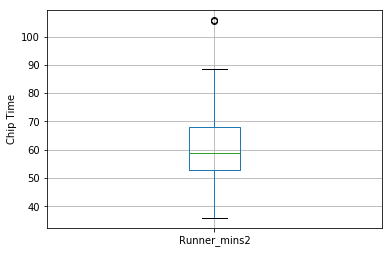

In [22]:
df2.boxplot()
plt.ylabel('Chip Time')

# Below is a distribution plot of runners' chip times plotted using the seaborn library. 

**The distribution looks almost normal**

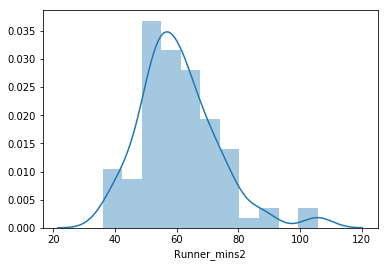

In [23]:
x = df2['Runner_mins2']
ax = sns.distplot(x)

# comparison of average minutes run by male and female

<BarContainer object of 90 artists>

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Chip time in minutes')

Text(0.5, 1.0, 'comparison of average minutes run by male and female')

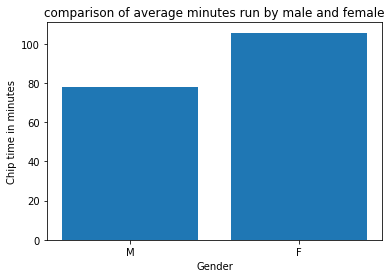

In [24]:
plt.bar(df2['Gender'],df2['Runner_mins2'])
plt.xlabel('Gender')
plt.ylabel('Chip time in minutes')
plt.title("comparison of average minutes run by male and female")

# We can use the groupby() method to compute summary statistics for males and females separately as shown below.

In [30]:
g_stats = df2.groupby("Gender", as_index=True).describe()
g_stats

Runner_mins2                                                         \
              count       mean        std        min        25%        50%   
Gender                                                                       
F              51.0  65.421569  13.066805  39.716667  57.808333  62.100000   
M              39.0  54.480769   9.671829  35.916667  49.258333  53.683333   

                               
              75%         max  
Gender                         
F       69.841667  105.716667  
M       56.991667   77.900000

**The average chip time for the females was ~66 mins**


**The average chip time for the males was ~55min respectively**